# Schwarshild coordinates Einstein Tensor calculations using Symbolic module - Textbook style. 

In [2]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import einsteinpy
import numba

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor
print(einsteinpy.__version__)
print(np.__version__)
print(numba.__version__)

sympy.init_printing()

0.5.dev0
1.25.2
0.58.0


### Look at http://arxiv.org/abs/1705.02496 . 



![alt-text](img/vaidya.png "Schwarschild coords")


In [3]:
syms = sympy.symbols("t r theta phi")
G, M, F, a, w, v = sympy.symbols("G M F a w v")
a = M*(1 - F*sin(w*(syms[0] - syms[1]/v)))

mT = sympy.diff(a, syms[0])
print(mT)
mR = sympy.diff(a, syms[1])
print(mR)


# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -1/(v*v*v*v)/(1 - 2*a/syms[1])
list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - 2*a/syms[1]) 
list2d[2][2] = (syms[1])**2
list2d[3][3] = (syms[1])**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


-F*M*w*cos(w*(-r/v + t))
F*M*w*cos(w*(-r/v + t))/v


⎡                   -1                                                        
⎢─────────────────────────────────────────                   0                
⎢   ⎛      ⎛       ⎛  ⎛  r    ⎞⎞    ⎞    ⎞                                    
⎢   ⎜  2⋅M⋅⎜- F⋅sin⎜w⋅⎜- ─ + t⎟⎟ + 1⎟    ⎟                                    
⎢ 4 ⎜      ⎝       ⎝  ⎝  v    ⎠⎠    ⎠    ⎟                                    
⎢v ⋅⎜- ────────────────────────────── + 1⎟                                    
⎢   ⎝                r                   ⎠                                    
⎢                                                                             
⎢                                                            1                
⎢                    0                      ──────────────────────────────────
⎢                                                 ⎛       ⎛  ⎛  r    ⎞⎞    ⎞  
⎢                                             2⋅M⋅⎜- F⋅sin⎜w⋅⎜- ─ + t⎟⎟ + 1⎟  
⎢                                                 ⎝ 

### Calculating the Einstein Tensor (with both indices covariant)

In [4]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡           ⎛             ⎛    ⎛r    ⎞⎞            ⎛  ⎛r    ⎞⎞            ⎛  ⎛
⎢0.25⋅F⋅M⋅w⋅⎜- 2.0⋅F⋅M⋅sin⎜2⋅w⋅⎜─ - t⎟⎟ - 4.0⋅M⋅cos⎜w⋅⎜─ - t⎟⎟ + 2.0⋅r⋅cos⎜w⋅⎜
⎢           ⎝             ⎝    ⎝v    ⎠⎠            ⎝  ⎝v    ⎠⎠            ⎝  ⎝
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                              2              
⎢                          5 ⎛         ⎛  ⎛r    ⎞⎞            ⎞               
⎢                       r⋅v ⋅⎜- F⋅M⋅sin⎜w⋅⎜─ - t⎟⎟ - M + 0.5⋅r⎟               
⎢                            ⎝         ⎝  ⎝v    ⎠⎠            ⎠               
⎢                                                                             
⎢                                          ⎛  ⎛r    ⎞⎞                        
⎢                               2⋅F⋅M⋅w⋅cos⎜w⋅⎜─ - t⎟⎟                        
⎢                                          ⎝  ⎝v    ⎠⎠                        
⎢                         ──────────────────────────

In [5]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡  ⎛     2    2  6  2    2⎛  ⎛r    ⎞⎞      2    2  6  2    2⎛  ⎛r    ⎞⎞      2
⎢M⋅⎜- 2⋅F ⋅M⋅r ⋅v ⋅w ⋅sin ⎜w⋅⎜─ - t⎟⎟ - 2⋅F ⋅M⋅r ⋅v ⋅w ⋅cos ⎜w⋅⎜─ - t⎟⎟ + 2⋅F 
⎢  ⎝                      ⎝  ⎝v    ⎠⎠                       ⎝  ⎝v    ⎠⎠       
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

(t, r, theta, phi, F, M, v, w)
(1175,)


Text(0.5, 1.0, 'T_01')

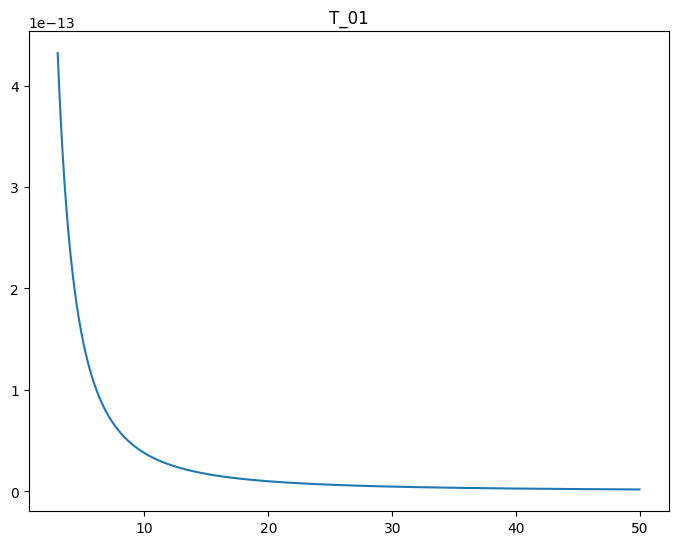

In [6]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

v = 200

theta = 1


#Make x values - which we will sub in for r 
x = np.arange(3.0, 50.0, 0.04)
print(x.shape)
func(0.5,2,0, 0, 1, 1, 20, 1)

# Call the functions
tt = []
tr = []
rr = []
hh = []
pp = []
for x_val in x:
    tt.append(func(1.0,x_val,theta, 1, 1, 1, v, 1)[0][0])
    tr.append(func(1.0,x_val,theta, 1, 1, 1, v, 1)[0][1])
    rr.append(func(1.0,x_val,theta, 1, 1, 1, v, 1)[1][1])
    hh.append(func(1.0,x_val,theta, 1, 1, 1, v, 1)[2][2]/(x_val*x_val))
    pp.append(func(1.0,x_val,theta, 1, 1, 1, v, 1)[3][3]/(x_val*x_val*sin(theta)*sin(theta)))

fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,tt)
#ax.plot(x,rr)
#ax.plot(x,tr)

#ax.plot(x,hh)

#ax.plot(x,pp)



ax.set_title("T_01")



In [7]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

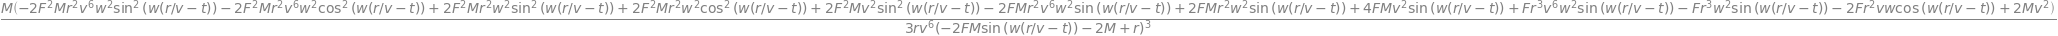

In [8]:
weyl[0,1,0,1]

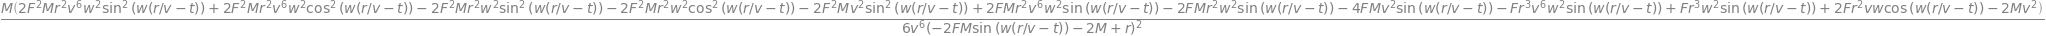

In [9]:
weyl[0,2,0,2]

In [10]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.5, 20.0, 0.04)
func(0.5,x,0, 0, 1)[0][1][0][1]

# Call the functions
y = func(1.0,x,1, 1, 1)[0][1][0][1]
z = -func(1.0,x,1, 1, 1)[0][2][0][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")




(t, r, theta, phi, F, M, v, w)


TypeError: _lambdifygenerated() missing 3 required positional arguments: 'M', 'v', and 'w'